<div style="text-align: center;">
<h2>INFSCI 2595 Machine Learning - Fall 2018 </h2>
<h1 style="font-size: 250%;">Assignment #1</h1>
<h3>Due: Sunday 09/30/2018</h3>
<h3>Total points: 100 </h3>
</div>

In [191]:
# Type in your information in the double quotes
firstName = "Divya"
lastName = "Gandhi"
pittID = "dig22"

In [192]:
#Libraries
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import Image
import statsmodels.formula.api as smf
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

---

<h3>  Problem #1. K-nearest neighbors  [20 points] </h3> 

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.
Suppose we wish to use this data set to make a prediction for Y when X1 = 1.2, X2 = 1.3, X3 = 2.4 using K-nearest neighbors.
hint: in problems 1-2 and 1-3, use "stats.mode" from scipy library and "nsmallest" function in dataframe to get n smallest values from the distance table calculated in 1-1.

|Obs.|X1|X2|X3|Y
|--|-------------------------------|
|1 |0.1|2.9|0|Green|
|2 |2.2|0|0|Green|
|3|0|1.3|3.3|Green|
|4|0|1.4|2.5|Red|
|5|-1.2|0|1.4|Red|
|6|1.1|1.2|1.1|Green|
|7|1.5|0|0|Green|
|8|0|1.3|1.9|Red|
|9|0|2.8|0|Green|

<b>Problem #1-1.</b> Compute the Euclidean distance between each observation and the test point, X1 = 1.2, X2 = 1.3, X3 = 2.4
The output should be a (9*1) column vector where each row shows the distance between the observations and the test point.


In [193]:
# Answer code 
# here is all data
df=pd.DataFrame({'obs':[1,2,3,4,5,6,7,8,9],
                 'X1':[0.1,2.2,0,0,-1.2,1.1,1.5,0,0],
                 'X2':[2.9,0,1.3,1.4,0,1.2,0,1.3,2.8],
                 'X3':[0,0,3.3,2.5,1.4,1.1,0,1.9,0],
                 'Y':['Green','Green','Green','Red','Red','Green','Green','Red','Green']})



In [194]:
df

,X1,X2,X3,Y,obs
0,0.1,2.9,0.0,Green,1
1,2.2,0.0,0.0,Green,2
2,0.0,1.3,3.3,Green,3
3,0.0,1.4,2.5,Red,4
4,-1.2,0.0,1.4,Red,5
5,1.1,1.2,1.1,Green,6
6,1.5,0.0,0.0,Green,7
7,0.0,1.3,1.9,Red,8
8,0.0,2.8,0.0,Green,9


In [195]:
x = np.array([2,3,1,0])
x.shape

(4,)

In [196]:
# As the test point is given x=1.2 , 1.3 , 2.4 , 
#therefore directly calculating distance as per that test point in the function
def euclidean_distance(observation_no,dataset):
    i=observation_no-1
    x=dataset.iloc[i,0]
    y=dataset.iloc[i,1]
    z=dataset.iloc[i,2]
    value=(x-1.2)**2+(y-1.3)**2+(z-2.4)**2
    distance=np.sqrt(value)
    return distance

In [197]:
# Now by using the eucidean distance function calculating the distance.
d1=euclidean_distance(1,df)
d2=euclidean_distance(2,df)
d3=euclidean_distance(3,df)
d4=euclidean_distance(4,df)
d5=euclidean_distance(5,df)
d6=euclidean_distance(6,df)
d7=euclidean_distance(7,df)
d8=euclidean_distance(8,df)
d9=euclidean_distance(9,df)
array=np.array([d1,d2,d3,d4,d5,d6,d7,d8,d9]) # putting all the observation calculated distance in the array like structure
array.shape=(9,1) # converting to column vector as 9 * 1 shape

In [198]:
print("distance:",array)

distance: [[ 3.08706981]
 [ 2.90688837]
 [ 1.5       ]
 [ 1.2083046 ]
 [ 2.90688837]
 [ 1.30766968]
 [ 2.74590604]
 [ 1.3       ]
 [ 3.07408523]]


=========================================================================================================================

<b>Problem #1-2.</b> What is our prediction with K = 1? and explain why.

Answer: 
The prediction comes out to be Red, as firstly the test_data has least distance with the observation having label red.
Moreover as we are just considering K=1 therefore we will only consider one observation that is nearest to the test point. And the observation that is nearest to the test point is observation 8 that has a label' red' with minimum distance

In [199]:
#Answer code
# Taking the data in the dataframe df
# 1. Calculating the train test split
from sklearn.neighbors import KNeighborsClassifier
x_data=df.iloc[:,0:3]
y_data=df.iloc[:,3] # removing the observation column
X_train, X_test,Y_train,Y_test=train_test_split(x_data,y_data,random_state=100)

# 2. Shape of training and testing samples
X_train.shape
X_test.shape

#3. Creating and fit(training) a model
knn=KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,Y_train)

Accuracy_1=knn.score(X_test,Y_test)

test_data=pd.DataFrame({'X1':[1.1],'X2':[1.3],'X3':[2.4]})

Y_predict=knn.predict(test_data)
Y_predict






array(['Red'], dtype=object)

=========================================================================================================================

<b>Problem #1-3.</b> What is our prediction with K = 3? K = 5? and explain why.

For prediction of k=3 => The nearest neighbors are the observation 4th(Red) , 6th(green) and 8th (Red) . 
As the majority class is of red therefore the predicted value is of red.

For prediction of k=5 => The nearest neighbors are the observation 4th(Red) , 6th(green) , 8th (Red), 7th(Green) , 2nd/5th (Green/Red) . 
As the majority class is of red therefore the predicted value is of  Green.

In [200]:
# Answer code 
knn_3=KNeighborsClassifier(n_neighbors=3)

X_train, X_test,Y_train,Y_test=train_test_split(x_data,y_data,random_state=100)

knn_3.fit(X_train,Y_train)

Accuracy_3=knn_3.score(X_test,Y_test)

Y_predict_3=knn_3.predict(test_data)
Y_predict_3



array(['Red'], dtype=object)

In [201]:
# Answer code 
knn_5=KNeighborsClassifier(n_neighbors=5)
X_train, X_test,Y_train,Y_test=train_test_split(x_data,y_data,random_state=70)
knn_5.fit(X_train,Y_train)

Accuracy_5=knn_5.score(X_test,Y_test)

Y_predict_5=knn_5.predict(test_data)
Y_predict_5

array(['Green'], dtype=object)

=========================================================================================================================

<b>Problem #1-4.</b>  How using a different number of K has an impact on the performance? explain.

=========================================================================================================================<br> The different number of K value different have different impact on performance. The performance increases with K values as now the test point has more number of observation around to check the minimum distance with 

In [202]:
print("K=1 Acuuracy",Accuracy_1)
print("K=3 Acuuracy",Accuracy_3)
print("K=5 Acuuracy",Accuracy_5)

K=1 Acuuracy 0.0
K=3 Acuuracy 0.333333333333
K=5 Acuuracy 0.666666666667


<h3>  Problem #2. Answer those questions about linear regression [30 points] </h3>  
- Writing a code is not required for this question<br>
- Feel free to select any type of submission you are comfortable with (Since it may require some mathematical formula and symbols; MS Word, or scanned version of your writing will be fine) 

<b>Problem #2-1.</b> Find the least squared fit of a linear regression model using the following traning data.

|Height(x)|Weight(y)|
|:--:|:-------------------------------:|
|63|127|
|64|121|
|66|142|
|69|157|
|69|162|
|71|156|
|71|169|
|72|165|
|73|181|

Coded just for calculation
The least squared fit
y=5.07x-194.77

In [242]:
#Write your answer # Coding is not required
data=pd.DataFrame({'x':[63,64,66,69,69,71,71,72,73],'y':[127,121,142,157,162,156,169,165,181]})
data['y'].sum()
sq=(data['x']**2).sum()
xy=(data['x']*data['y']).sum()

y_bar=sum(y(i))/n (where i is from range 0 to 9)

137.66343042071196

In [251]:
68.66*5.070-153.33

194.7762

========================================================================================================================

<b>Problem #2-2.</b> Given the test data below, compute the R-squared metric of the fitted model.

|X(feeding)|Y(death)|
|:--:|:-------------------------------:|
|27|10|
|41|9|
|56|28|
|50|40|
|73|39|
|38|59|
|72|60|
|87|62|
|51|64|

In [293]:
#Write your answer # Coding is not required
data2=pd.DataFrame({'X':[27,41,56,50,73,38,72,87,51],'Y':[10,9,28,40,39,599,60,62,64]})
data2.X.sum() # 495
data2.Y.sum() #911
xy_sum=(data2.X*data2.Y).sum()  
x_sq=(data2.X**2).sum()
sum=0
for i in range(0,9):
    y_bar=235.42-2.44*data2.X[i]
    y=data2.Y[i]
    diff=y_bar-y
    sum=sum+diff**2

    

In [298]:
18126.46/282213.55

0.06422958784225634

In [296]:
tss=0
for i in range(0,9):
    y=data2.Y[i]
    diff=101.22-y
    tss=tss+diff**2
tss

282213.55559999996

======================================================================================================================= <br>=======================================================================================================================

<h3>  Problem #3. This question involves the use of multiple linear regression on the Boston dataset [30 points]</h3> <br>
In this part, you should download and analyze **"Boston House Prices"** dataset. <br>

Here use a code below to download the  dataset: 

In [203]:
dataset = load_boston()
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


Hint: You may need to "import statsmodels.formula.api as smf" for some statistical analysis

<b>Problem #3-1</b> Print the description of the dataset. 

<b> Answer the following question:</b> 

- Whole dataset contains 14 attributes, (13 numeric/categorical predictive and 1 target value)  what is a abbreviation of the target value? 

In [204]:
#Code
print(dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

=======================================================================================================================

<b>Problem #3-2 </b> Generate descriptive statistics using DataFrame. (hint: use "DataFrame . describe" function)<br>

Follow two steps to answer questions.
- Create a DataFrame usnig "data" from the dataset with columns using "feature_names".
- Generate descriptive statistics 

<b> Answer the following questions:</b> 

-  Which feature has the lowest range (minimum and maximum value)?

-  Which feature has the higest mean?  

-  Which feature has a highest variance? 

In [205]:
#Code
dataframe=pd.DataFrame(dataset["data"],columns=dataset.feature_names)
description=dataframe.describe()
print(dataframe.describe())
description.shape
def least_range():
    for i in range(0,13):
        min=dataframe.iloc[3,i]
        max=dataframe.iloc[7,i]
        if i==0:
            set_diff=max-min
            least=0
        else:
            diff=max-min
            if diff<set_diff:
                least=i
                set_diff=diff
    return least

def highest_mean():
    for i in range(0,13):
        mean=dataframe.iloc[1,i]
        if i==0:
            set_mean=mean
            high=0
        else:
            if mean>set_mean:
                set_mean=mean
                high=i
    return high
def high_var():
    for i in range(0,13):
        var=dataframe.iloc[2,i]
        if i==0:
            set_var=var
            high_var=0
        else:
            if var>set_var:
                set_var=var
                high_var=i
    return high_var

print("Lowest Range column index",least_range()) # PTRATIO  pupil-teacher ratio by town
print("Highest_mean column index",highest_mean()) # B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
print("Highest_var column index",high_var())# B  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town




             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

=======================================================================================================================

<b>Problem #3-3 </b> Feature Scaling

<b> Answer the following questions:</b> 

- From the information above, Do you recommend **feature scaling** to improve performance? Explain.  

- What is a difference between MinMaxScaler and StandardScaler? 

yes i would recommend feature scaling becomes of the amount of range variation between each variable is so much. 
For example the variable PTRATIO has the smallest range where as the variable  B has range in between 0.32 to 396

In [206]:
# code here
from sklearn import preprocessing
X_train, X_test, Y_train, Y_test =train_test_split(dataset['data'],dataset['target'],random_state=100)
scaler=preprocessing.MinMaxScaler().fit(X_train) 
X_train_transformed=scaler.transform(X_train) 
X_test_transformed=scaler.transform(X_test)

=======================================================================================================================

<b>Problem #3-4 </b> Calculate and report **correlations** between features and the target 

<b> Answer the following questions:</b> 

- What is a difference between positive and negative numbers on the correlation table? Explain.
- What is the feature that is most correlated with the target? Do you think it is the most or the least helpful features in predicting the
target class? Explain.

In [207]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [208]:
# code here
combined_data=dataframe # the dataframe is the dataset of features
data=pd.DataFrame({"target":dataset["target"]}) # creating a dataset for target
combined_data=combined_data.join(data) # joining datset of feature with target
combined_data.corr() # generating correlation matrix 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [306]:
combined_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Answer 1. The negative number shows the negative correlation in the table and positive number shows the positive correlation
Answer2. RM-average number of rooms per dwelling has the highest correlation with the target. It is the most helpful feature 
in predicting the target. 

=======================================================================================================================

<b>Problem #3-5 </b> 
Follow two steps to answer questions.

- Add 1 more column (dataset.target) to your DataFrame (give a name).

- Find the correlation matrix that shows the correlation between each pair of features. <br>

- Plot a correlation matrix<br> You can use the code below or write your own code to plot a correlation matrix *(extra point for writing your own code)* 

 <b>Answer the following questions:</b> 

- What is the correlation between the feature RM and the LSTAT?
- What does this value of correlation indicate?

The correlation between feature Rm and LSTAT is -0.61. This value of correlation indicate that they rea negatively 
correlated that is increase in one value lead to decrease in other

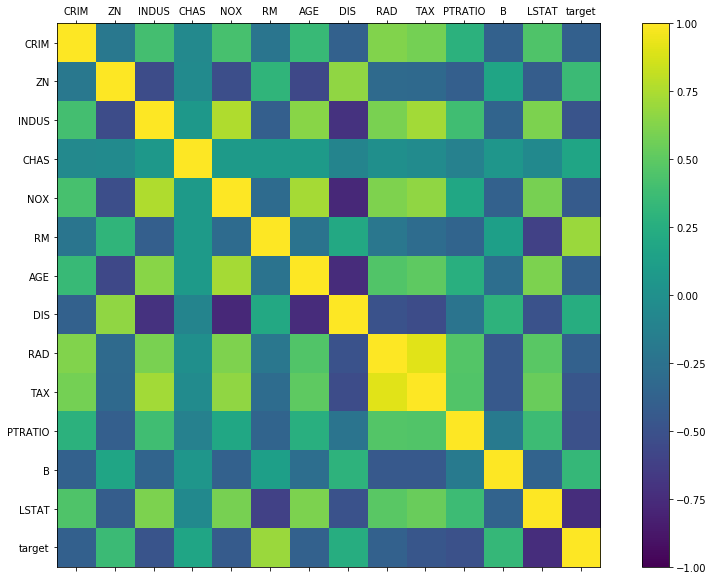

In [314]:
#code here
from matplotlib import pyplot as plt
from matplotlib import cm as cm
names=combined_data.columns
correlations = combined_data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [313]:
correlations

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [307]:
names

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

=======================================================================================================================

<b>Problem #3-6 </b> Scatter plot. <br> 

Follow three steps to answer questions <br> 
- Plot RM versus target variable 
- Plot TAX versus target variable 
- Plot LSTAT versus target variable <br> 

<b> Answer the following questions:</b> 
- Is the relationship linear?
- Which looks the most nonlinear? Explain your choice


**Plot RM versus target variable**

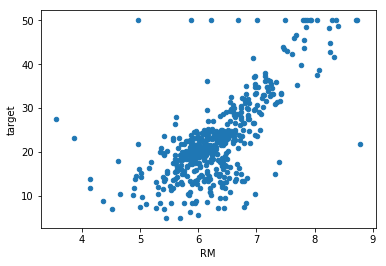

In [210]:
#code here
combined_data.plot.scatter(x="RM",y="target")
#plt.scatter(combined_data.RM,combined_data.target)

**Plot TAX versus target variable**

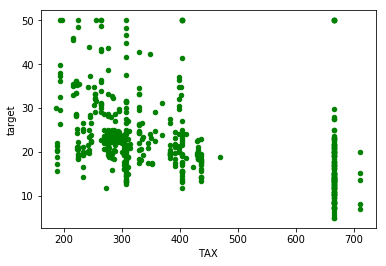

In [211]:
#code here
combined_data.plot.scatter(x="TAX",y="target",c="green")

**Plot LSTAT versus target variable **

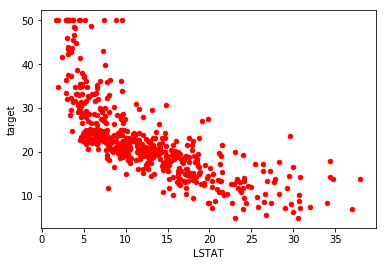

In [212]:
#code here
combined_data.plot.scatter(x="LSTAT",y="target",c="RED")

=======================================================================================================================

<b>Problem #3-7.</b> Follow steps to answer questions.
> *Use train_test_split() with the option "random_state=0".

1. Fit a linear regression model with RM and LSTAT features only. Find the R-squared metric. 
2. Fit a linear regression model using RM, LSTAT and include the interaction term (RM * LSTAT). How R-squared metric differs from the previous model without interaction term?
3. Fit a linear regression model using LSTAT and include the polynomial term ( $LSTAT^2$).  Find the R-squared metric.
4. Fit linear regression model using LSTAT and include the polynomial term ( $LSTAT^2$ and $LSTAT^4$ ). Find the R-squared metric. 
- How does R-squared metric differ in the previous models ? <br> Comment your observation. 

**1.  Fit a linear regression model with RM and LSTAT features only**

In [213]:
#code here
X_train, X_test, Y_train, Y_test =train_test_split(dataset['data'],dataset['target'],random_state=0)
train_data=pd.DataFrame(X_train,columns=dataset.feature_names)
test_data=pd.DataFrame(X_test,columns=dataset.feature_names)
linreg_1= LinearRegression().fit(train_data.iloc[:,[5,12]], Y_train)

linreg_1.score(test_data.iloc[:,[5,12]],Y_test)

0.56924454158353455

**2 Fit a linear regression model using RM, LSTAT and include the interaction term (RM * LSTAT)**

In [214]:
#code here
train_data["InteractionTerm1"]=train_data["RM"]*train_data["LSTAT"]
test_data["InteractionTerm1"]=test_data["RM"]*test_data["LSTAT"]
train_data.shape
linreg_2= LinearRegression().fit(train_data.iloc[:,[5,12,13]], Y_train)
linreg_2.score(test_data.iloc[:,[5,12,13]],Y_test)

0.66152077067706827

**3 Fit a linear regression model using LSTAT and include the polynomial term (  LSTAT^2 )**

In [215]:
#code here
train_data["InteractionTerm2"]=train_data["LSTAT"]**2
test_data["InteractionTerm2"]=test_data["LSTAT"]**2
train_data.shape
linreg_3= LinearRegression().fit(train_data.iloc[:,[12,14]], Y_train)
linreg_3.score(test_data.iloc[:,[12,14]],Y_test)

0.55187533541377987

**4. Fit linear regression model using LSTAT and include the polynomial term (  LSTAT^2  and  LSTAT^4)**

In [216]:
#code here
train_data["InteractionTerm3"]=train_data["LSTAT"]**4
test_data["InteractionTerm3"]=test_data["LSTAT"]**4
train_data.shape
linreg_4= LinearRegression().fit(train_data.iloc[:,[12,14,15]], Y_train)
linreg_4.score(test_data.iloc[:,[12,14,15]],Y_test)

0.56964931272777852

=========================================================================================================================

<b>Problem #3-8.</b> Fit all features (13 features) in the dataset to a multiple linear regression model, and report<br> 

> (1) p-values for each feature. 

<b> Answer the following questions:</b> 

- What does p-value means
- What are the important features? <br> 


In [217]:
#code here

linreg_5= LinearRegression().fit(train_data.iloc[:,:12], Y_train)
linreg_5.score(test_data.iloc[:,:12],Y_test)


0.54320582656423144

In [218]:
combined_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [219]:
X=combined_data.iloc[:,:11]
Y=combined_data.iloc[:,12]
X_1=sm.add_constant(X)
model=sm.OLS(Y,X_1)
Fitting_results=model.fit()
print(Fitting_results.summary().tables[1])
print('p-values are: \n', Fitting_results.pvalues)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.1867      4.227      6.194      0.000      17.881      34.493
CRIM           0.1099      0.029      3.815      0.000       0.053       0.166
ZN             0.0144      0.012      1.169      0.243      -0.010       0.039
INDUS          0.1008      0.055      1.831      0.068      -0.007       0.209
CHAS          -1.1829      0.772     -1.533      0.126      -2.699       0.333
NOX            6.2343      3.413      1.827      0.068      -0.471      12.939
RM            -4.3814      0.317    -13.806      0.000      -5.005      -3.758
AGE            0.0885      0.011      7.927      0.000       0.067       0.110
DIS            0.1671      0.179      0.933      0.351      -0.185       0.519
RAD            0.0652      0.059      1.098      0.273      -0.051       0.182
TAX           -0.0009      0.003     -0.254      0.8

Answer 1: p value is sthe probability of oberving a statistical value (say t-statistic )equal to the oberved or larger if there is no association between the response and feature.

Small p value reflects there is no association between features and output

large p value reflect low association between features and output

Answer 2: The important features are :

DIS
RAD
TAX
PTRATIO
ZN
CHAS


==========================================================================+============================================== <br> =========================================================================================================================

<b>Problem #4.</b>  Encoding categorical values

Given a dataset (encoding.csv) with three features and twenty samples with the following types:

- "Gender" is nominal feature in which order is not important (mapping can be used)
- "Race" is nominal feature (all values have the same weight). label encoding and one-hot encoding can be used together.
- "Satisfaction" is nominal feature in which order is important (label encoding can be used)

Use appropriate encoding method for each feature to convert the categorical values into a meaningful numerical values.

In [220]:
#code here
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
encoding_data=pd.read_csv("encoding.csv")
encoding_data.head()

#generalmapping
encoding_data["Gender"]=encoding_data.Gender.astype("category").cat.codes


# label+one hot encoded
label_encoder = LabelEncoder()
encoding_data["Race"]= label_encoder.fit_transform(encoding_data["Race"])
integer_data=encoding_data["Race"].reshape(len(encoding_data["Race"]),1)
integer_data.shape
onehotencoded= onehot_encoder.fit_transform(integer_data)

# One hot encoded
onehot_encoder = OneHotEncoder(sparse=False)
encoding_data["Satisfaction"]= label_encoder.fit_transform(encoding_data["Satisfaction"])




/Users/divya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [221]:
encoding_data.head()

,Gender,Race,Satisfaction
0,1,4,4
1,1,4,1
2,1,4,4
3,0,1,0
4,1,1,1


### Submission
Once you complete the assignment, <br>
Name your file in the format of <b style='color:red'>LASTNAME-PITTID-Assignment1.ipynb</b>, and submit it on the courseweb